# Predicting Housing Prices in Ames Iowa


1. [Data Wrangling](#wr) <br>
    1.1 [The Data](#td)<br>
    1.2 [Dealing with Missing Values and Duplicates](#dwn) <br>
    1.3 [Feature encoding](#fe) <br>
    1.4 [Transforming Variables](#tv) <br>
    1.5 [Feature Engineering ](#fen) <br>
    1.6 [Splitting the Data and Removing Outliers](#std) <br>
2. [Model Creation/Evaluation](#mc) <br>
    2.1 [Recursive Feature Elimination with Linear Regression](#lr) <br>
    2.2 [Ridge Regression](#rr) <br>
    2.3 [Model Comparison](#mc1) <br>
3. [Making Predictions](#mp) <br>


***

## Data Wrangling
<a id="dw" > 

### The Data
<a id="td" > 

Data set contains information from the Ames Assessorís Office used in computing assessed values for individual residential properties sold in Ames, IA from 2006 to 2010.

VARIABLE DESCRIPTIONS:
Tab characters are used to separate variables in the data file. The data has 82 columns which include 23 nominal, 23 ordinal, 14 discrete, and 20 continuous variables (and 2 additional observation identifiers).

SOURCES: 
Ames, Iowa Assessorís Office 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from math import sqrt
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, ParameterGrid, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge, Lasso, HuberRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
#from mlxtend.regressor import StackingRegressor
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
sns.set()
%matplotlib inline
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.height', 100)
pd.set_option('display.max_rows', 60)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 100)

In [4]:
train = pd.read_csv('house-prices.csv')
train.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,484,528275070,60,RL,nan,8795,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,None,0.000,Gd,TA,PConc,Gd,TA,No,GLQ,300.000,Unf,0.000,652.000,952.000,GasA,Ex,Y,SBrkr,980,1276,0,2256,0.000,0.000,2,1,4,1,Gd,8,Typ,1,TA,BuiltIn,2000.000,Fin,2.000,554.000,TA,TA,Y,224,54,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,Normal,236000
1,2586,535305120,20,RL,75.000,10170,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1951,1951,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,522.000,TA,TA,CBlock,TA,TA,No,Unf,0.000,Unf,0.000,216.000,216.000,GasA,TA,Y,SBrkr,1575,0,0,1575,0.000,0.000,1,1,2,1,Gd,5,Typ,1,Gd,Attchd,1951.000,Unf,2.000,400.000,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,155000
2,2289,923228250,160,RM,21.000,2001,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,BrkFace,80.000,TA,TA,CBlock,TA,TA,No,Unf,0.000,Unf,0.000,546.000,546.000,GasA,Fa,Y,SBrkr,546,546,0,1092,0.000,0.000,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1970.000,Unf,1.000,286.000,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,75000
3,142,535152150,20,RL,70.000,10552,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1959,1959,Hip,CompShg,BrkFace,BrkFace,None,0.000,TA,TA,CBlock,TA,TA,No,Rec,1018.000,Unf,0.000,380.000,1398.000,GasA,Gd,Y,SBrkr,1700,0,0,1700,0.000,1.000,1,1,4,1,Gd,6,Typ,1,Gd,Attchd,1959.000,RFn,2.000,447.000,TA,TA,Y,0,38,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,165500
4,2042,903475060,190,RM,60.000,10120,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,OldTown,Feedr,Norm,2fmCon,2.5Unf,7,4,1910,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.000,Fa,TA,CBlock,TA,TA,No,Unf,0.000,Unf,0.000,925.000,925.000,GasA,TA,N,FuseF,964,925,0,1889,0.000,0.000,1,1,4,2,TA,9,Typ,1,Gd,Detchd,1960.000,Unf,1.000,308.000,TA,TA,N,0,0,264,0,0,0,NaN,MnPrv,NaN,0,1,2007,WD,Normal,122000


In [5]:
pred = pd.read_csv('house-prices-test.csv')
pred.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
0,2217,909279080,50,RL,nan,11275,Pave,NaN,IR1,HLS,AllPub,Corner,Mod,Crawfor,Norm,Norm,1Fam,1.5Fin,6,7,1932,1950,Gable,CompShg,MetalSd,MetalSd,BrkFace,480.000,TA,TA,CBlock,TA,TA,Mn,Rec,297.000,LwQ,557.000,0.000,854.000,GasA,TA,Y,SBrkr,1096,895,0,1991,0.000,0.000,1,1,3,1,TA,7,Typ,1,Gd,Detchd,1977.000,Unf,2.000,432.000,TA,Fa,Y,0,0,19,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal
1,837,907126050,20,RL,65.000,9757,Pave,NaN,Reg,Low,AllPub,Inside,Mod,CollgCr,Norm,Norm,1Fam,1Story,5,7,1994,1994,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,Gd,PConc,TA,TA,No,ALQ,755.000,Unf,0.000,235.000,990.000,GasA,Ex,Y,SBrkr,990,0,0,990,1.000,0.000,1,0,3,1,TA,5,Typ,0,NaN,Attchd,1995.000,RFn,1.000,440.000,TA,TA,Y,66,0,0,0,92,0,NaN,NaN,NaN,0,10,2009,WD,Normal
2,2397,528144030,60,RL,86.000,11065,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,Stone,788.000,Gd,TA,PConc,Gd,TA,Mn,Unf,0.000,Unf,0.000,1085.000,1085.000,GasA,Ex,Y,SBrkr,1120,850,0,1970,0.000,0.000,2,1,3,1,Ex,8,Typ,1,Gd,BuiltIn,2006.000,Fin,3.000,753.000,TA,TA,Y,177,74,0,0,0,0,NaN,NaN,NaN,0,10,2006,New,Partial
3,1963,535452060,20,RL,70.000,7000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1960,2002,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,45.000,TA,TA,CBlock,TA,TA,No,Rec,588.000,Unf,0.000,422.000,1010.000,GasA,Ex,Y,SBrkr,1134,0,0,1134,0.000,0.000,1,0,2,1,TA,6,Typ,0,NaN,Attchd,1960.000,RFn,1.000,254.000,TA,TA,Y,0,16,0,0,0,0,NaN,MnWw,NaN,0,4,2007,WD,Family
4,306,911202100,50,C (all),66.000,8712,Pave,Pave,Reg,HLS,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1.5Fin,4,7,1900,1950,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,Stone,TA,TA,Mn,Unf,0.000,Unf,0.000,859.000,859.000,GasA,Gd,Y,SBrkr,859,319,0,1178,0.000,0.000,1,0,2,1,TA,7,Typ,0,NaN,Detchd,1964.000,RFn,1.000,384.000,TA,TA,N,68,0,98,0,0,0,NaN,NaN,NaN,0,1,2010,WD,Abnorml


In [6]:
print('There are {:,} rows '.format(train.shape[0]) + 'and {} columns in our training dataset'.format(train.shape[1]))

There are 2,430 rows and 82 columns in our training dataset


In [7]:
print('There are {:,} rows '.format(pred.shape[0]) + 'and {} columns in our predicton dataset'.format(pred.shape[1]))

There are 500 rows and 81 columns in our predicton dataset


In [8]:
train.drop(columns=['Order'], inplace=True)
#df['SalePrice'] = np.log(df[['SalePrice']])

In [9]:
pred.drop(columns=['Order'], inplace=True)

In [10]:
train.describe()

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2430.000,2430.000,2010.000,2430.000,2430.000,2430.000,2430.000,2430.000,2410.000,2429.000,2429.000,2429.000,2429.000,2430.000,2430.000,2430.000,2430.000,2428.000,2428.000,2430.000,2430.000,2430.000,2430.000,2430.000,2430.000,2292.000,2429.000,2429.000,2430.000,2430.000,2430.000,2430.000,2430.000,2430.000,2430.000,2430.000,2430.000,2430.000
mean,714937485.497,57.093,69.202,10243.558,6.089,5.570,1971.167,1984.239,101.995,443.944,51.074,556.481,1051.499,1159.845,326.673,4.587,1491.105,0.434,0.060,1.561,0.370,2.843,1.043,6.409,0.595,1977.861,1.762,471.979,93.918,47.092,22.295,2.472,16.529,2.401,56.180,6.209,2007.784,180199.693
std,188733939.109,42.903,23.487,8353.925,1.415,1.116,30.208,20.751,176.612,457.454,172.144,439.650,444.690,393.098,419.491,47.216,496.178,0.528,0.243,0.548,0.501,0.818,0.208,1.552,0.647,25.545,0.758,215.754,128.107,67.124,62.386,24.880,56.822,36.112,616.662,2.722,1.312,79607.467
min,526301100.000,20.000,21.000,1470.000,1.000,1.000,1875.000,1950.000,0.000,0.000,0.000,0.000,0.000,334.000,0.000,0.000,334.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,0.000,1896.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2006.000,12789.000
25%,528477042.500,20.000,58.000,7482.000,5.000,5.000,1954.000,1966.000,0.000,0.000,0.000,216.000,794.000,880.500,0.000,0.000,1120.000,0.000,0.000,1.000,0.000,2.000,1.000,5.000,0.000,1960.000,1.000,324.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000,2007.000,129000.000
50%,535454055.000,50.000,68.000,9500.000,6.000,5.000,1973.000,1993.000,0.000,375.000,0.000,462.000,990.000,1086.000,0.000,0.000,1440.000,0.000,0.000,2.000,0.000,3.000,1.000,6.000,1.000,1978.000,2.000,478.000,0.000,27.000,0.000,0.000,0.000,0.000,0.000,6.000,2008.000,160000.000
75%,907135240.000,70.000,80.000,11604.500,7.000,6.000,2000.000,2003.000,164.750,737.000,0.000,799.000,1299.000,1387.750,698.000,0.000,1740.000,1.000,0.000,2.000,1.000,3.000,1.000,7.000,1.000,2002.000,2.000,576.000,168.000,70.000,0.000,0.000,0.000,0.000,0.000,8.000,2009.000,213099.750
max,1007100110.000,190.000,313.000,215245.000,10.000,9.000,2010.000,2010.000,1600.000,5644.000,1526.000,2336.000,6110.000,5095.000,2065.000,1064.000,5642.000,3.000,2.000,4.000,2.000,8.000,3.000,15.000,4.000,2207.000,4.000,1488.000,1424.000,742.000,1012.000,508.000,490.000,800.000,17000.000,12.000,2010.000,755000.000


In [11]:
pred.describe()

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
count,500.000,500.000,430.000,500.000,500.000,500.000,500.000,500.000,497.000,500.000,500.000,500.000,500.000,500.000,500.000,500.000,500.000,500.000,500.000,500.000,500.000,500.000,500.000,500.000,500.000,479.000,500.000,500.000,500.000,500.000,500.000,500.000,500.000,500.000,500.000,500.000,500.000
mean,712165772.840,58.820,69.330,9683.132,6.124,5.530,1972.274,1984.402,101.419,436.242,43.158,572.776,1052.176,1158.160,378.142,5.114,1541.416,0.418,0.066,1.594,0.428,2.910,1.052,6.608,0.620,1979.430,1.788,476.902,92.946,49.680,26.496,3.180,13.440,1.476,23.688,6.248,2007.824
std,188887911.790,41.337,22.815,4950.630,1.394,1.088,30.440,21.403,190.962,446.826,153.891,438.924,420.686,386.358,467.378,41.670,547.214,0.510,0.256,0.574,0.507,0.874,0.240,1.665,0.655,25.436,0.772,211.744,117.629,69.233,72.020,26.391,52.348,33.004,175.375,2.680,1.340
min,526351030.000,20.000,21.000,1300.000,2.000,1.000,1872.000,1950.000,0.000,0.000,0.000,0.000,0.000,494.000,0.000,0.000,540.000,0.000,0.000,0.000,0.000,1.000,0.000,3.000,0.000,1895.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2006.000
25%,528457627.500,20.000,59.000,7329.000,5.000,5.000,1953.000,1964.000,0.000,0.000,0.000,242.750,784.000,864.000,0.000,0.000,1173.500,0.000,0.000,1.000,0.000,2.000,1.000,6.000,0.000,1960.000,1.000,312.750,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000,2007.000
50%,535453170.000,60.000,69.000,9150.500,6.000,5.000,1975.000,1994.000,0.000,342.500,0.000,478.000,990.000,1077.500,0.000,0.000,1454.500,0.000,0.000,2.000,0.000,3.000,1.000,6.000,1.000,1987.000,2.000,480.000,0.000,26.000,0.000,0.000,0.000,0.000,0.000,6.000,2008.000
75%,907255525.000,75.000,80.000,11312.750,7.000,6.000,2001.250,2004.000,148.000,706.250,0.000,811.500,1303.000,1382.250,731.250,0.000,1769.500,1.000,0.000,2.000,1.000,3.000,1.000,7.000,1.000,2003.000,2.000,576.250,171.250,72.000,0.000,0.000,0.000,0.000,0.000,8.000,2009.000
max,923277080.000,190.000,153.000,53504.000,10.000,9.000,2010.000,2010.000,1378.000,2260.000,1474.000,1969.000,3200.000,3228.000,1796.000,514.000,4676.000,2.000,2.000,4.000,2.000,6.000,3.000,12.000,3.000,2010.000,5.000,1220.000,728.000,444.000,584.000,360.000,576.000,738.000,2500.000,12.000,2010.000


### Dealing with Missing Values and Duplicates
<a id="dwn" > 

In [12]:
# We create versions of our datasets with only numeric/categorical columns
train_catergorical = train.select_dtypes(include=object)
train_numeric = train.select_dtypes(exclude=object)

In [13]:
# Missing values in numeric columns of our traing dataset
train[train_numeric.columns].isnull().sum()

PID                  0
MS SubClass          0
Lot Frontage       420
Lot Area             0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Mas Vnr Area        20
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full Bath       2
Bsmt Half Bath       2
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
TotRms AbvGrd        0
Fireplaces           0
Garage Yr Blt      138
Garage Cars          1
Garage Area          1
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
Mo Sold              0
Yr Sold              0
SalePrice            0
dtype: int64

In [14]:
# NaNs in these two columns most likely refers to a value of 0
train['Lot Frontage'].fillna(value=0, inplace=True)
train['Mas Vnr Area'].fillna(value=0, inplace=True)
# We dont know what the meaning of NaNs in this column is and we are therefore going to fill it with the meadian value
train['Garage Yr Blt'].fillna(train['Garage Yr Blt'].median(), inplace=True)


In [15]:
train[train_catergorical.columns].isnull().sum()

MS Zoning            0
Street               0
Alley             2267
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        20
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual           71
Bsmt Cond           71
Bsmt Exposure       74
BsmtFin Type 1      71
BsmtFin Type 2      72
Heating              0
Heating QC           0
Central Air          0
Electrical           1
Kitchen Qual         0
Functional           0
Fireplace Qu      1186
Garage Type        136
Garage Finish      138
Garage Qual        138
Garage Cond        138
Paved Drive          0
Pool QC           2418
Fence             1941
Misc Feature      2340
Sale Type            0
Sale Condition       0
dtype: int6

In [16]:
# According to the available information in the documentation NaNs should be NA in these columns
train['Bsmt Qual'].fillna(value='NA', inplace=True)
train['Bsmt Cond'].fillna(value='NA', inplace=True)
train['Bsmt Exposure'].fillna(value='NA', inplace=True)
train['BsmtFin Type 1'].fillna(value='NA', inplace=True)
train['BsmtFin Type 2'].fillna(value='NA', inplace=True)
train['Fireplace Qu'].fillna(value='NA', inplace=True)
train['Garage Type'].fillna(value='NA', inplace=True)
train['Garage Finish'].fillna(value='NA', inplace=True)
train['Garage Qual'].fillna(value='NA', inplace=True)
train['Garage Cond'].fillna(value='NA', inplace=True)
train['Fence'].fillna(value='NA', inplace=True)
train['Pool QC'].fillna(value='NA', inplace=True)
train['Misc Feature'].fillna(value='NA', inplace=True)
train['Alley'].fillna(value='NA', inplace=True)
train['Mas Vnr Type'].fillna(value='None', inplace=True)

In [17]:
train.isnull().sum().sort_values().tail(10)

Mas Vnr Area      0
BsmtFin SF 1      1
Total Bsmt SF     1
BsmtFin SF 2      1
Bsmt Unf SF       1
Garage Area       1
Garage Cars       1
Electrical        1
Bsmt Half Bath    2
Bsmt Full Bath    2
dtype: int64

In [18]:
# We are going to drop the remaining few missing values from our dataset
train.dropna(inplace=True)

In [19]:
print('There are {} NaNs left in our training dataset'.format(train.isnull().sum().max()))

There are 0 NaNs left in our training dataset


In [20]:
print('There are {:,} rows '.format(train.shape[0]) + 'and {} columns left in our training dataset'.format(train.shape[1]))

There are 2,426 rows and 81 columns left in our training dataset


In [21]:
print('There are {:,} duplicates in our training dataset'.format(train.duplicated().sum()))

There are 0 duplicates in our training dataset


### Repeating this procedure with our prediction dataset

In [22]:
pred_catergorical = pred.select_dtypes(include=object)
pred_numeric = pred.select_dtypes(exclude=object)

In [23]:
pred[pred_numeric.columns].isnull().sum()

PID                 0
MS SubClass         0
Lot Frontage       70
Lot Area            0
Overall Qual        0
Overall Cond        0
Year Built          0
Year Remod/Add      0
Mas Vnr Area        3
BsmtFin SF 1        0
BsmtFin SF 2        0
Bsmt Unf SF         0
Total Bsmt SF       0
1st Flr SF          0
2nd Flr SF          0
Low Qual Fin SF     0
Gr Liv Area         0
Bsmt Full Bath      0
Bsmt Half Bath      0
Full Bath           0
Half Bath           0
Bedroom AbvGr       0
Kitchen AbvGr       0
TotRms AbvGrd       0
Fireplaces          0
Garage Yr Blt      21
Garage Cars         0
Garage Area         0
Wood Deck SF        0
Open Porch SF       0
Enclosed Porch      0
3Ssn Porch          0
Screen Porch        0
Pool Area           0
Misc Val            0
Mo Sold             0
Yr Sold             0
dtype: int64

In [24]:
pred['Lot Frontage'].fillna(value=0, inplace=True)
pred['Garage Yr Blt'].fillna(train['Garage Yr Blt'].median(), inplace=True)
pred['Mas Vnr Area'].fillna(value=0, inplace=True)

In [25]:
pred[pred_catergorical.columns].isnull().sum()

MS Zoning           0
Street              0
Alley             465
Lot Shape           0
Land Contour        0
Utilities           0
Lot Config          0
Land Slope          0
Neighborhood        0
Condition 1         0
Condition 2         0
Bldg Type           0
House Style         0
Roof Style          0
Roof Matl           0
Exterior 1st        0
Exterior 2nd        0
Mas Vnr Type        3
Exter Qual          0
Exter Cond          0
Foundation          0
Bsmt Qual           9
Bsmt Cond           9
Bsmt Exposure       9
BsmtFin Type 1      9
BsmtFin Type 2      9
Heating             0
Heating QC          0
Central Air         0
Electrical          0
Kitchen Qual        0
Functional          0
Fireplace Qu      236
Garage Type        21
Garage Finish      21
Garage Qual        21
Garage Cond        21
Paved Drive         0
Pool QC           499
Fence             417
Misc Feature      484
Sale Type           0
Sale Condition      0
dtype: int64

In [26]:
pred['Bsmt Qual'].fillna(value='NA', inplace=True)
pred['Bsmt Cond'].fillna(value='NA', inplace=True)
pred['Bsmt Exposure'].fillna(value='NA', inplace=True)
pred['BsmtFin Type 1'].fillna(value='NA', inplace=True)
pred['BsmtFin Type 2'].fillna(value='NA', inplace=True)
pred['Fireplace Qu'].fillna(value='NA', inplace=True)
pred['Garage Type'].fillna(value='NA', inplace=True)
pred['Garage Finish'].fillna(value='NA', inplace=True)
pred['Garage Qual'].fillna(value='NA', inplace=True)
pred['Garage Cond'].fillna(value='NA', inplace=True)
pred['Fence'].fillna(value='NA', inplace=True)
pred['Pool QC'].fillna(value='NA', inplace=True)
pred['Misc Feature'].fillna(value='NA', inplace=True)
pred['Alley'].fillna(value='NA', inplace=True)
pred['Mas Vnr Type'].fillna(value='None', inplace=True)

In [27]:
print('There are {} NaNs left in our prediction dataset'.format(pred.isnull().sum().max()))

There are 0 NaNs left in our prediction dataset


In [28]:
print('There are {:,} rows '.format(pred.shape[0]) + 'and {} columns left in our prediction dataset'.format(pred.shape[1]))

There are 500 rows and 80 columns left in our prediction dataset


In [29]:
print('There are {:,} duplicates in our prediction dataset'.format(pred.duplicated().sum()))

There are 0 duplicates in our prediction dataset


### Feature Encoding
<a id="fe" > 

In [30]:
train[train_catergorical.columns].head()

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
0,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,BuiltIn,Fin,TA,TA,Y,NA,NA,NA,WD,Normal
1,RL,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,Unf,Unf,GasA,TA,Y,SBrkr,Gd,Typ,Gd,Attchd,Unf,TA,TA,Y,NA,NA,NA,WD,Normal
2,RM,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,Gable,CompShg,CemntBd,CmentBd,BrkFace,TA,TA,CBlock,TA,TA,No,Unf,Unf,GasA,Fa,Y,SBrkr,TA,Typ,NA,Attchd,Unf,TA,TA,Y,NA,NA,NA,WD,Normal
3,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,BrkFace,None,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
4,RM,Pave,NA,IR1,Bnk,AllPub,Inside,Gtl,OldTown,Feedr,Norm,2fmCon,2.5Unf,Hip,CompShg,Wd Sdng,Wd Sdng,None,Fa,TA,CBlock,TA,TA,No,Unf,Unf,GasA,TA,N,FuseF,TA,Typ,Gd,Detchd,Unf,TA,TA,N,NA,MnPrv,NA,WD,Normal


In [31]:
# We will look at ordinal variables in our data and convert them accordingly 
# The Information on the specific columns can be found in the documentation.txt file.
train['Lot Shape'] = train['Lot Shape'].map({'Reg':1, 'IR1':2, 'IR2':3, 'IR3':3})
train['Utilities'] = train['Utilities'].map({'AllPub':1, 'NoSewr':2, 'NoSeWa':3, 'ELO':4})
train['Land Slope'] = train['Land Slope'].map({'Gtl':1, 'Mod':2, 'Sev':3})
train['Exter Qual'] = train['Exter Qual'].map({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5})
train['Exter Cond'] = train['Exter Cond'].map({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5})
train['Bsmt Qual'] = train['Bsmt Qual'].map({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5, 'NA': 6})
train['Bsmt Cond'] = train['Bsmt Cond'].map({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5, 'NA': 6})
train['Bsmt Exposure'] = train['Bsmt Exposure'].map({'Gd':1, 'Av':2, 'Mn':3, 'No':4, 'NA':5})
train['BsmtFin Type 1'] = train['BsmtFin Type 1'].map({'GLQ':1, 'ALQ':2, 'BLQ':3, 'Rec':4, 'LwQ': 5, 'Unf': 6, 'NA':7})
train['BsmtFin Type 2'] = train['BsmtFin Type 2'].map({'GLQ':1, 'ALQ':2, 'BLQ':3, 'Rec':4, 'LwQ': 5, 'Unf': 6, 'NA':7})
train['Heating QC'] = train['Heating QC'].map({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5})
train['Electrical'] = train['Electrical'].map({'SBrkr':1, 'FuseA':2, 'FuseF':3, 'FuseP':4, 'Mix': 5})
train['Kitchen Qual'] = train['Kitchen Qual'].map({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5})
train['Functional'] = train['Functional'].map({'Typ':1, 'Min1':2, 'Min2':3, 'Mod':4, 'Maj1':5, 'Maj2':6, 'Sev':7, 'Sal':8})
train['Fireplace Qu'] = train['Fireplace Qu'].map({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5, 'NA': 6})
train['Garage Finish'] = train['Garage Finish'].map({'Fin':1, 'RFn':2, 'Unf':3, 'NA':4})
train['Garage Qual'] = train['Garage Qual'].map({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5, 'NA': 6})
train['Garage Cond'] = train['Garage Cond'].map({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5, 'NA': 6}) 
train['Paved Drive'] = train['Paved Drive'].map({'Y':1, 'P':2, 'N':3})
train['Pool QC'] = train['Pool QC'].map({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'NA':5})
train['Fence'] = train['Fence'].map({'GdPrv':1, 'MnPrv':2, 'GdWo':3, 'MnWw':4, 'NA':5})

In [32]:
pred[pred_catergorical.columns].head()

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
0,RL,Pave,NA,IR1,HLS,AllPub,Corner,Mod,Crawfor,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,MetalSd,MetalSd,BrkFace,TA,TA,CBlock,TA,TA,Mn,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,Gd,Detchd,Unf,TA,Fa,Y,NA,NA,NA,WD,Normal
1,RL,Pave,NA,Reg,Low,AllPub,Inside,Mod,CollgCr,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,Gd,PConc,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,NA,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
2,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Gd,TA,Mn,Unf,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,Gd,BuiltIn,Fin,TA,TA,Y,NA,NA,NA,New,Partial
3,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,Ex,Y,SBrkr,TA,Typ,NA,Attchd,RFn,TA,TA,Y,NA,MnWw,NA,WD,Family
4,C (all),Pave,Pave,Reg,HLS,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,Stone,TA,TA,Mn,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,NA,Detchd,RFn,TA,TA,N,NA,NA,NA,WD,Abnorml


In [33]:
# We repeat this process with the preditcion dataset
pred['Lot Shape'] = pred['Lot Shape'].map({'Reg':1, 'IR1':2, 'IR2':3, 'IR3':3})
pred['Utilities'] = pred['Utilities'].map({'AllPub':1, 'NoSewr':2, 'NoSeWa':3, 'ELO':4})
pred['Land Slope'] = pred['Land Slope'].map({'Gtl':1, 'Mod':2, 'Sev':3})
pred['Exter Qual'] = pred['Exter Qual'].map({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5})
pred['Exter Cond'] = pred['Exter Cond'].map({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5})
pred['Bsmt Qual'] = pred['Bsmt Qual'].map({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5, 'NA': 6})
pred['Bsmt Cond'] = pred['Bsmt Cond'].map({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5, 'NA': 6})
pred['Bsmt Exposure'] = pred['Bsmt Exposure'].map({'Gd':1, 'Av':2, 'Mn':3, 'No':4, 'NA':5})
pred['BsmtFin Type 1'] = pred['BsmtFin Type 1'].map({'GLQ':1, 'ALQ':2, 'BLQ':3, 'Rec':4, 'LwQ': 5, 'Unf': 6, 'NA':7})
pred['BsmtFin Type 2'] = pred['BsmtFin Type 2'].map({'GLQ':1, 'ALQ':2, 'BLQ':3, 'Rec':4, 'LwQ': 5, 'Unf': 6, 'NA':7})
pred['Heating QC'] = pred['Heating QC'].map({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5})
pred['Electrical'] = pred['Electrical'].map({'SBrkr':1, 'FuseA':2, 'FuseF':3, 'FuseP':4, 'Mix': 5})
pred['Kitchen Qual'] = pred['Kitchen Qual'].map({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5})
pred['Functional'] = pred['Functional'].map({'Typ':1, 'Min1':2, 'Min2':3, 'Mod':4, 'Maj1':5, 'Maj2':6, 'Sev':7, 'Sal':8})
pred['Fireplace Qu'] = pred['Fireplace Qu'].map({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5, 'NA': 6})
pred['Garage Finish'] = pred['Garage Finish'].map({'Fin':1, 'RFn':2, 'Unf':3, 'NA':4})
pred['Garage Qual'] = pred['Garage Qual'].map({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5, 'NA': 6})
pred['Garage Cond'] = pred['Garage Cond'].map({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'Po':5, 'NA': 6}) 
pred['Paved Drive'] = pred['Paved Drive'].map({'Y':1, 'P':2, 'N':3})
pred['Pool QC'] = pred['Pool QC'].map({'Ex':1, 'Gd':2, 'TA':3, 'Fa':4, 'NA':5})
pred['Fence'] = pred['Fence'].map({'GdPrv':1, 'MnPrv':2, 'GdWo':3, 'MnWw':4, 'NA':5})

### Transforming Variables
<a id="tv" > 

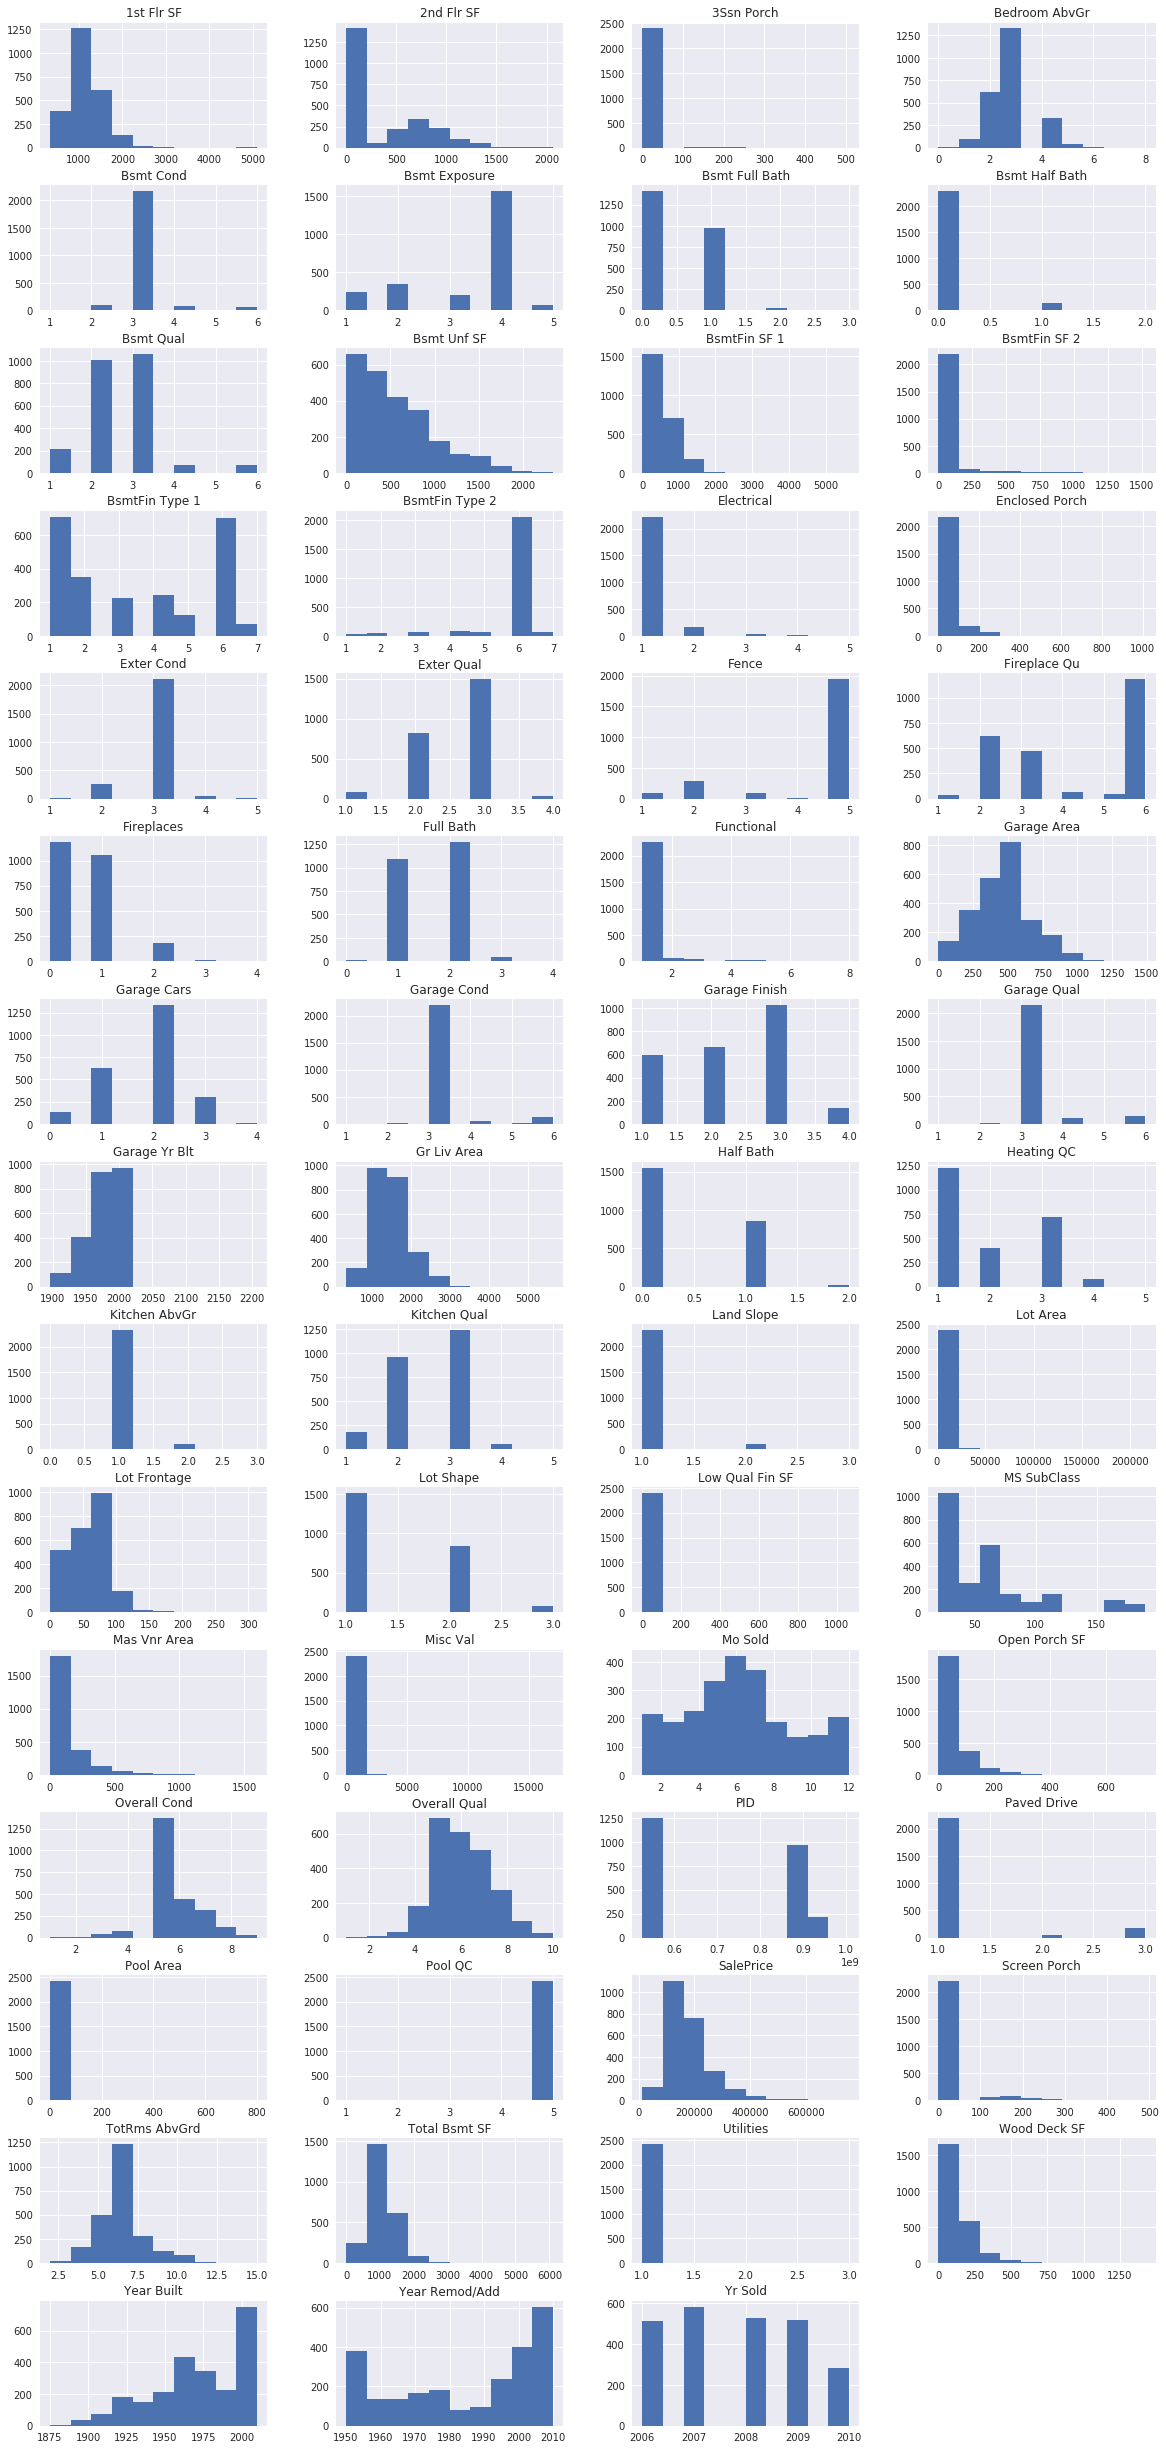

In [34]:
train.hist(figsize=(20,140), layout=(47, 4))
plt.show()

In [35]:
# Identifiying skewed features
skewed_columns = train_numeric.columns[abs(train_numeric.skew()) > 1.7]
skewed_columns

Index(['Lot Area', 'Mas Vnr Area', 'BsmtFin SF 2', 'Low Qual Fin SF', 'Bsmt Half Bath',
       'Kitchen AbvGr', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'SalePrice'],
      dtype='object')

In [36]:
# Transforming skewed features
train[skewed_columns[:-1]] = np.log1p(train[skewed_columns[:-1]])
pred[skewed_columns[:-1]] = np.log1p(pred[skewed_columns[:-1]])

### Feature Engineering
<a id="fen" > 

In [37]:
# After studying the documentation we come up with new features that might have some predicting power
train['Total Area'] = train['Total Bsmt SF'] + train['Gr Liv Area']
train['Total Rooms'] = train['TotRms AbvGrd'] + train['Bsmt Full Bath'] + train['Bsmt Half Bath'] + train['Full Bath'] + train['Half Bath']
train['Avg Room'] = train['Total Rooms']/train['Total Area']
train['Rating Overall'] = (train['Overall Qual'] + train['Overall Cond'])/2
train['Rating Ext'] = (train['Exter Qual'] + train['Exter Cond'])/2
train['Rating Bsmt'] = (train['Bsmt Qual'] + train['Bsmt Cond'] + train['Bsmt Exposure'])/3
train['Rating Garage'] = (train['Garage Qual'] + train['Garage Cond'])/2

In [38]:
# We repeat this process with our prediction dataset
pred['Total Area'] = pred['Total Bsmt SF'] + pred['Gr Liv Area']
pred['Total Rooms'] = pred['TotRms AbvGrd'] + pred['Bsmt Full Bath'] + pred['Bsmt Half Bath'] + pred['Full Bath'] + pred['Half Bath']
pred['Avg Room'] = pred['Total Rooms']/pred['Total Area']
pred['Rating Overall'] = (pred['Overall Qual'] + pred['Overall Cond'])/2
pred['Rating Ext'] = (pred['Exter Qual'] + pred['Exter Cond'])/2
pred['Rating Bsmt'] = (pred['Bsmt Qual'] + pred['Bsmt Cond'] + pred['Bsmt Exposure'])/3
pred['Rating Garage'] = (pred['Garage Qual'] + pred['Garage Cond'])/2

In [39]:
#We use one-hot encoding to create dummy-variables for all the categorial non-ordinal variables
train = pd.get_dummies(train)

In [40]:
# We repeat this procedure but use drop_first to avoid multicollinearity
pred = pd.get_dummies(pred, drop_first=True)

In [41]:
print('There are {:,} columns '.format(train.shape[1]) + 'in our training dataset and {} columns in our prediction dataset'.format(pred.shape[1]))

There are 238 columns in our training dataset and 186 columns in our prediction dataset


In [42]:
# We drop all dummy variables that are not present in our training dataset
pred.drop(columns=['Roof Matl_Roll', 'Exterior 2nd_Other'], inplace=True)

In [43]:
train.set_index('SalePrice', inplace=True)

In [44]:
# We reduce our training dataset to the variables that are available in our prediction data
train =  train[pred.columns]

In [45]:
train.reset_index(inplace=True)

In [46]:
print('There are {:,} columns '.format(train.shape[1]) + 'in our training dataset and {} columns in our prediction dataset'.format(pred.shape[1]))

There are 185 columns in our training dataset and 184 columns in our prediction dataset


### Splitting the Data and Removing Outliers
<a id="std" > 

In [47]:
# We 50/50 split our training dataset
train_df, test_df = train_test_split(
train, train_size=0.8, test_size=0.2, random_state=0)

print('Train DataFrame:', train_df.shape)
print('Test DataFrame:', test_df.shape)

Train DataFrame: (1940, 185)
Test DataFrame: (486, 185)


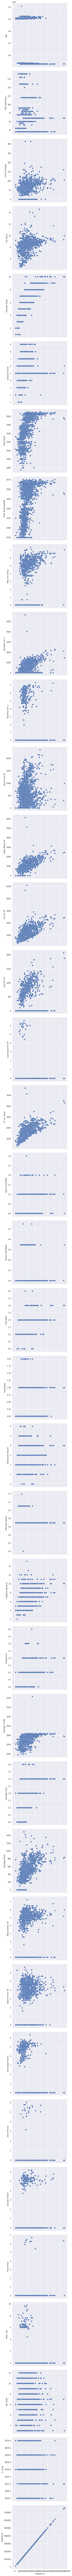

In [48]:
sns.pairplot(train_df, size=5,
            x_vars=['SalePrice'],
            y_vars= train_numeric.columns)

plt.show()

In [49]:
# Manually removing outliers from the training data
train_df = train_df[train_df['SalePrice'] < 700000]
train_df = train_df[train_df['Misc Val'] < 100000]
train_df = train_df[train_df['Enclosed Porch'] < 400]
train_df = train_df[train_df['Open Porch SF'] < 600]
train_df = train_df[train_df['Wood Deck SF'] < 1000]
train_df = train_df[train_df['Gr Liv Area'] < 4000]
train_df = train_df[train_df['1st Flr SF'] < 3000]
train_df = train_df[train_df['2nd Flr SF'] < 1500]
train_df = train_df[train_df['Total Bsmt SF'] < 4000]
train_df = train_df[train_df['BsmtFin SF 2'] < 1200]
train_df = train_df[train_df['BsmtFin SF 1'] < 3000]
train_df = train_df[train_df['Mas Vnr Area'] < 1000]
train_df = train_df[train_df['Lot Area'] < 40000]
train_df = train_df[train_df['Lot Frontage'] < 200]
train_df = train_df[train_df['Garage Yr Blt'] < 2020]

***

## Model Creation/Evaluation
<a id="mc" > 

### Recursive Feature Elimination with Linear Regression
<a id="lr" > 

In [126]:
train.set_index('PID', inplace=True)
pred.set_index('PID', inplace=True)
train_df.set_index('PID', inplace=True)
test_df.set_index('PID', inplace=True)

In [127]:
# We convert the SalePrice since we are using RMSLE to evaluate our models
train['SalePrice'] = np.log10(train['SalePrice'])
train_df['SalePrice'] = np.log10(train_df['SalePrice'])
test_df['SalePrice'] = np.log10(test_df['SalePrice'])

/anaconda2/envs/exts-aml2/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [128]:
#We standardize our features since we will be using RFE
X_tr = scale(train_df.drop(columns=['SalePrice']))
y_tr = train_df['SalePrice'].values

X_te = scale(test_df.drop(columns=['SalePrice']))
y_te = test_df['SalePrice'].values

In [129]:
lr = LinearRegression()

In [130]:
# Recursive feature elimination with the two best featues
rfe_simple = RFE(lr, 2)
lr_simple = rfe_simple.fit(X_tr, y_tr)

y_tr_simple_pred = lr_simple.predict(X_tr)
y_te_simple_pred = lr_simple.predict(X_te)

print('RMSLE on our train data: {:.3f}'.format(sqrt(mse(y_tr,y_tr_simple_pred))))
print('RMSLE on our test data: {:.3f}'.format(sqrt(mse(y_te,y_te_simple_pred))))

print('Score on train data:{}'.format(lr_simple.score(X_tr, y_tr)))
print('Score on train data:{}'.format(lr_simple.score(X_te, y_te)))

print('MAE of the SalePrice on our train data: {:.3f}'.format(mae(10**y_tr, 10**y_tr_simple_pred)))
print('MAE of the SalePrice on our test data: {:.3f}'.format(mae(10**y_te, 10**y_te_simple_pred)))
train_df.drop(columns=['SalePrice']).iloc[:, lr_simple.support_].head()

RMSLE on our train data: 0.083
RMSLE on our test data: 0.091
Score on train data:0.7315016686827442
Score on train data:0.7374672645629721
MAE of the SalePrice on our train data: 20935.381
MAE of the SalePrice on our test data: 27477.741


,Year Built,Total Area
PID,,
909101330,1922,996.000
908130020,2002,1828.000
908102040,1900,3472.000
526353030,1968,4220.000
527164120,1994,2607.000


In [131]:
# Recursive feature elimination with the best 15 featues
rfe_mid = RFE(lr, 15)
lr_mid = rfe_mid.fit(X_tr, y_tr)

y_tr_mid_pred = lr_mid.predict(X_tr)
y_te_mid_pred = lr_mid.predict(X_te)

print('RMSLE on our train data: {:.3f}'.format(sqrt(mse(y_tr, y_tr_mid_pred))))
print('RMSLE on our test data: {:.3f}'.format(sqrt(mse(y_te, y_te_mid_pred))))

print('Score on train data:{}'.format(lr_mid.score(X_tr, y_tr)))
print('Score on train data:{}'.format(lr_mid.score(X_te, y_te)))

print('MAE of the SalePrice on our train data: {:.3f}'.format(mae(10**y_tr, 10**y_tr_mid_pred)))
print('MAE of the SalePrice on our test data: {:.3f}'.format(mae(10**y_te, 10**y_te_mid_pred)))
train_df.drop(columns=['SalePrice']).iloc[:, lr_mid.support_].head()

RMSLE on our train data: 0.052
RMSLE on our test data: 0.065
Score on train data:0.8935457961696162
Score on train data:0.8686615465853276
MAE of the SalePrice on our train data: 13340.840
MAE of the SalePrice on our test data: 20135.359


,Lot Area,Overall Qual,Year Built,Bsmt Unf SF,Heating QC,Garage Cars,Garage Cond,Total Area,Rating Overall,MS Zoning_FV,MS Zoning_RL,MS Zoning_RM,Garage Type_NA,Sale Condition_Normal,Sale Condition_Partial
PID,,,,,,,,,,,,,,,
909101330,8088,2,1922,498.000,3,1.000,4,996.000,2.500,0,1,0,0,1,0
908130020,8050,6,2002,142.000,1,0.000,6,1828.000,5.500,0,1,0,1,1,0
908102040,8777,5,1900,188.000,2,0.000,6,3472.000,6.000,0,1,0,1,1,0
526353030,11160,7,1968,1045.000,1,2.000,3,4220.000,6.000,0,1,0,0,1,0
527164120,10832,7,1994,712.000,1,2.000,3,2607.000,6.000,0,1,0,0,1,0


In [132]:
# Linear regression with all features
lr.fit(X_tr, y_tr)

y_tr_pred_lr = lr.predict(X_tr)
y_te_pred_lr = lr.predict(X_te)

print('RMSLE on our train data: {:.3f}'.format(sqrt(mse(y_tr, y_tr_pred_lr))))
print('RMSLE on our test data: {:.3f}'.format(sqrt(mse(y_te, y_te_pred_lr))))

print('Score on train data:{}'.format(lr.score(X_tr, y_tr)))
print('Score on train data:{}'.format(lr.score(X_te, y_te)))

#print('MAE of the SalePrice on our train data: {:.3f}'.format(mae(10**y_tr, 10**y_tr_pred)))
#print('MAE of the SalePrice on our test data: {:.3f}'.format(mae(10**y_te, 10**y_te_pred)))

RMSLE on our train data: 0.041
RMSLE on our test data: 10806586935.949
Score on train data:0.9337034188324713
Score on train data:-3.669333448781888e+21


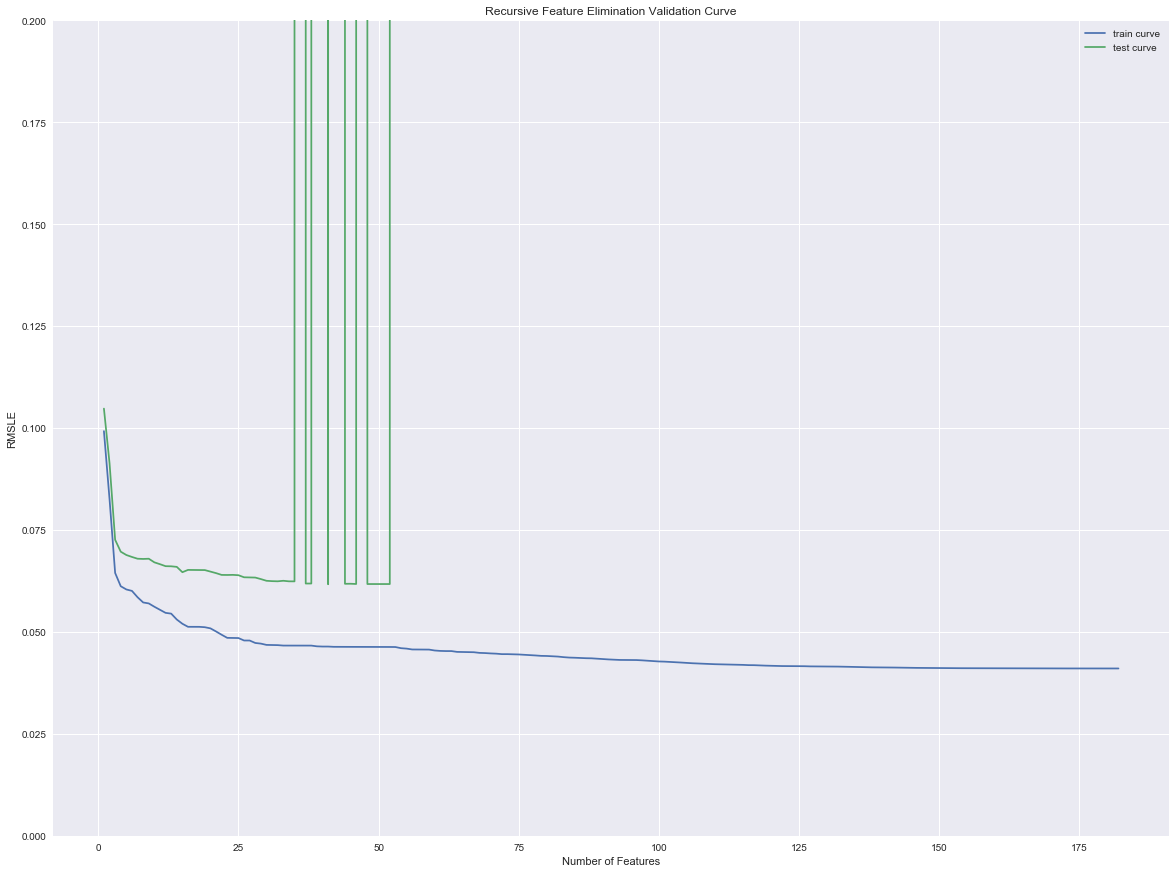

In [133]:
# Recursive featue elimination validation curve
n_Features = range(1, X_tr.shape[1])

train_scores = []
test_scores = []

for feature in n_Features:
    
    rfe_n = RFE(lr, feature)
    rfe_n.fit(X_tr, y_tr)
    
    y_tr_pred = rfe_n.predict(X_tr)
    train_scores.append(sqrt(mse(y_tr, y_tr_pred)))
    
    y_te_pred = rfe_n.predict(X_te)
    test_scores.append(sqrt(mse(y_te, y_te_pred)))

fig = plt.figure(figsize=(20,15))
plt.plot(n_Features, train_scores, label='train curve')
plt.plot(n_Features, test_scores, label='test curve')
plt.xlabel('Number of Features')
plt.ylabel('RMSLE')
plt.ylim(0, 0.2)
plt.title('Recursive Feature Elimination Validation Curve')
plt.legend()
plt.show()

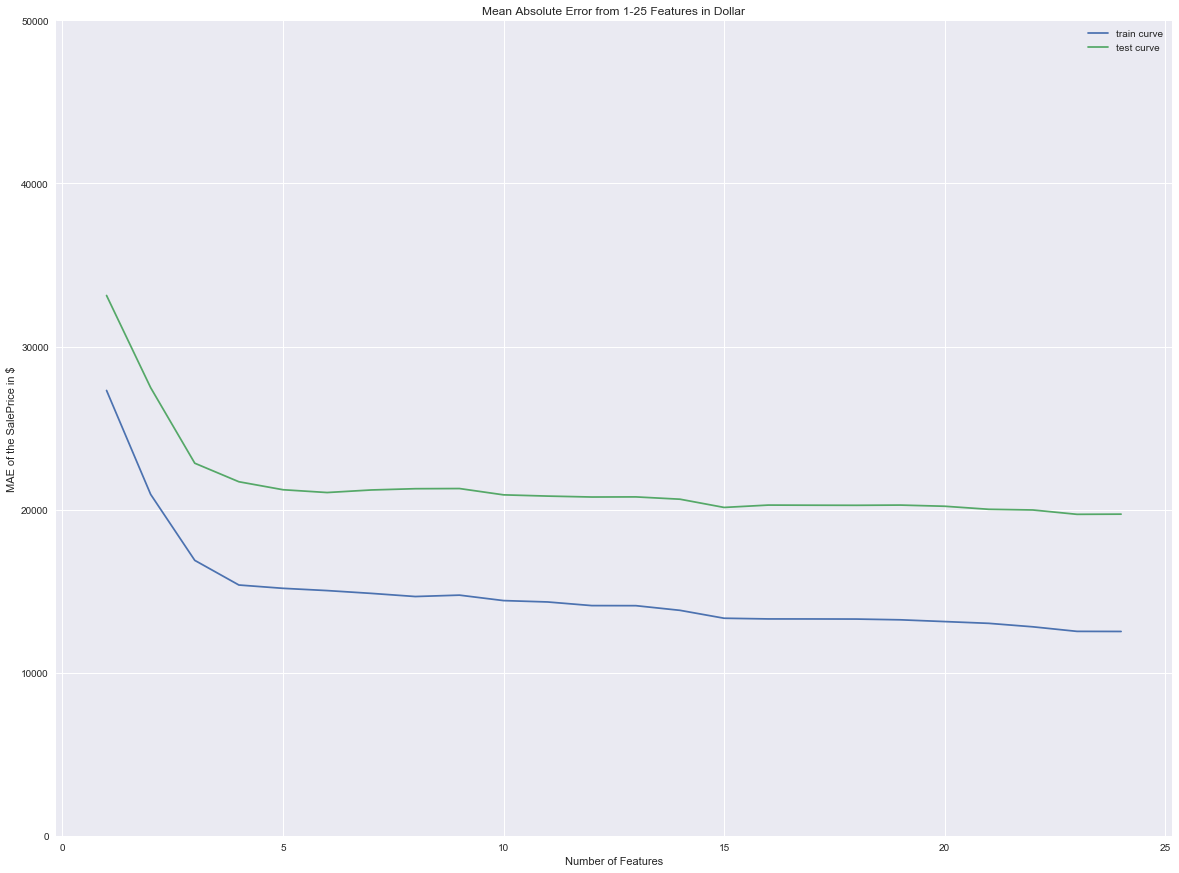

In [134]:
# Plotting the mean absolute error from 1-25 features in $
n_Features = range(1, 25)

train_scores = []
test_scores = []

for feature in n_Features:
    
    rfe_n = RFE(lr, feature)
    rfe_n.fit(X_tr, y_tr)
                        
                        
    y_tr_pred = rfe_n.predict(X_tr)
    train_scores.append(mae(10**y_tr, 10**y_tr_pred))
    
    y_te_pred = rfe_n.predict(X_te)
    test_scores.append(mae(10**y_te, 10**y_te_pred))

fig = plt.figure(figsize=(20,15))
plt.plot(n_Features, train_scores, label='train curve')
plt.plot(n_Features, test_scores, label='test curve')
plt.xlabel('Number of Features')
plt.ylabel('MAE of the SalePrice in $')
plt.ylim(0, 50000)
plt.title('Mean Absolute Error from 1-25 Features in Dollar')
plt.legend()
plt.show()

### Ridge Regression
<a id="rr" > 

We will try to use regularzation to resolve the issues seen in the plots above

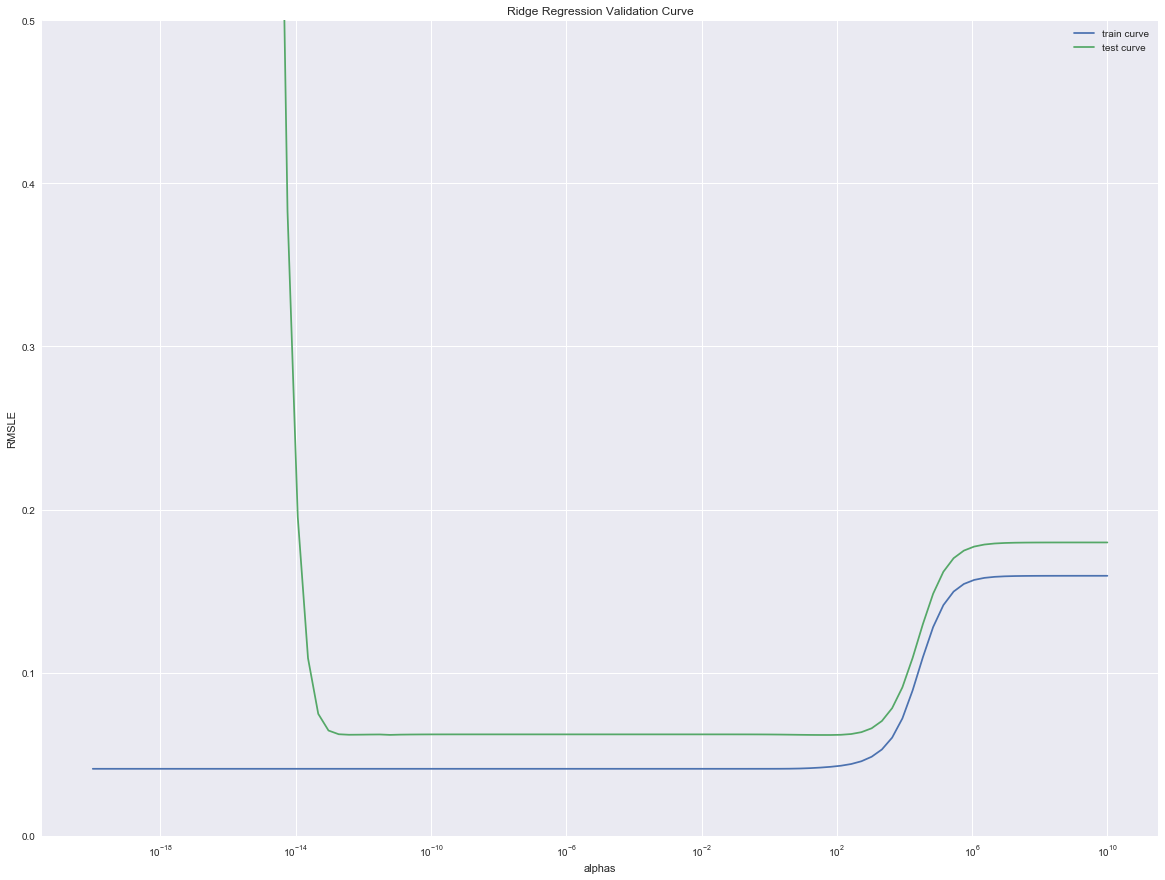

In [135]:
alphas = np.logspace(-20,10,num=100)

train_scores = []
test_scores = []

for alpha in alphas:
    ridge = Ridge(alpha)
    ridge.fit(X_tr, y_tr)
    
    y_tr_pred = ridge.predict(X_tr)
    train_scores.append(sqrt(mse(y_tr, y_tr_pred)))
    
    y_te_pred = ridge.predict(X_te)
    test_scores.append(sqrt(mse(y_te, y_te_pred)))

# Plot the validation curves
fig = plt.figure(figsize=(20,15))
plt.semilogx(alphas, train_scores, label='train curve')
plt.semilogx(alphas, test_scores, label='test curve')
plt.xlabel('alphas')
plt.ylabel('RMSLE')
plt.ylim(0, 0.5)
plt.title('Ridge Regression Validation Curve')
plt.legend()
plt.show()

warnings.filterwarnings("ignore", category=RuntimeWarning)

In [136]:
# Find best alpha
idx = np.argmin(test_scores)
best_alpha = alphas[idx]
print('Best alpha {:.1e}'.format(best_alpha))

ridge = Ridge(best_alpha)

Best alpha 6.6e+01


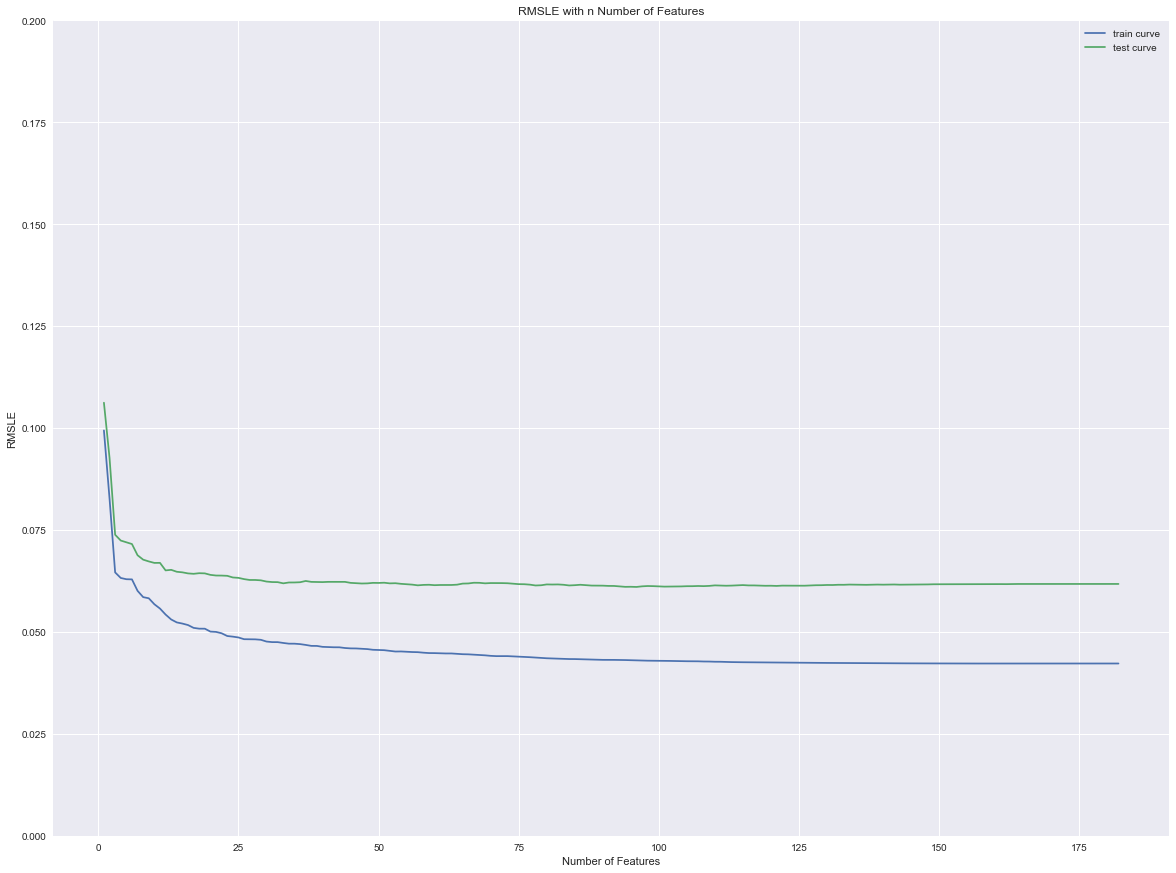

In [137]:
n_Features = range(1, X_tr.shape[1])

train_scores = []
test_scores = []

for feature in n_Features:
    
    rfe_n = RFE(ridge, feature)
    rfe_n.fit(X_tr, y_tr)
    
    y_tr_pred = rfe_n.predict(X_tr)
    train_scores.append(sqrt(mse(y_tr, y_tr_pred)))
    
    y_te_pred = rfe_n.predict(X_te)
    test_scores.append(sqrt(mse(y_te, y_te_pred)))

# Plot the validation curves
fig = plt.figure(figsize=(20,15))
plt.plot(n_Features, train_scores, label='train curve')
plt.plot(n_Features, test_scores, label='test curve')
plt.xlabel('Number of Features')
plt.ylabel('RMSLE')
plt.ylim(0, 0.2)
plt.title('RMSLE with n Number of Features')
plt.legend()
plt.show()

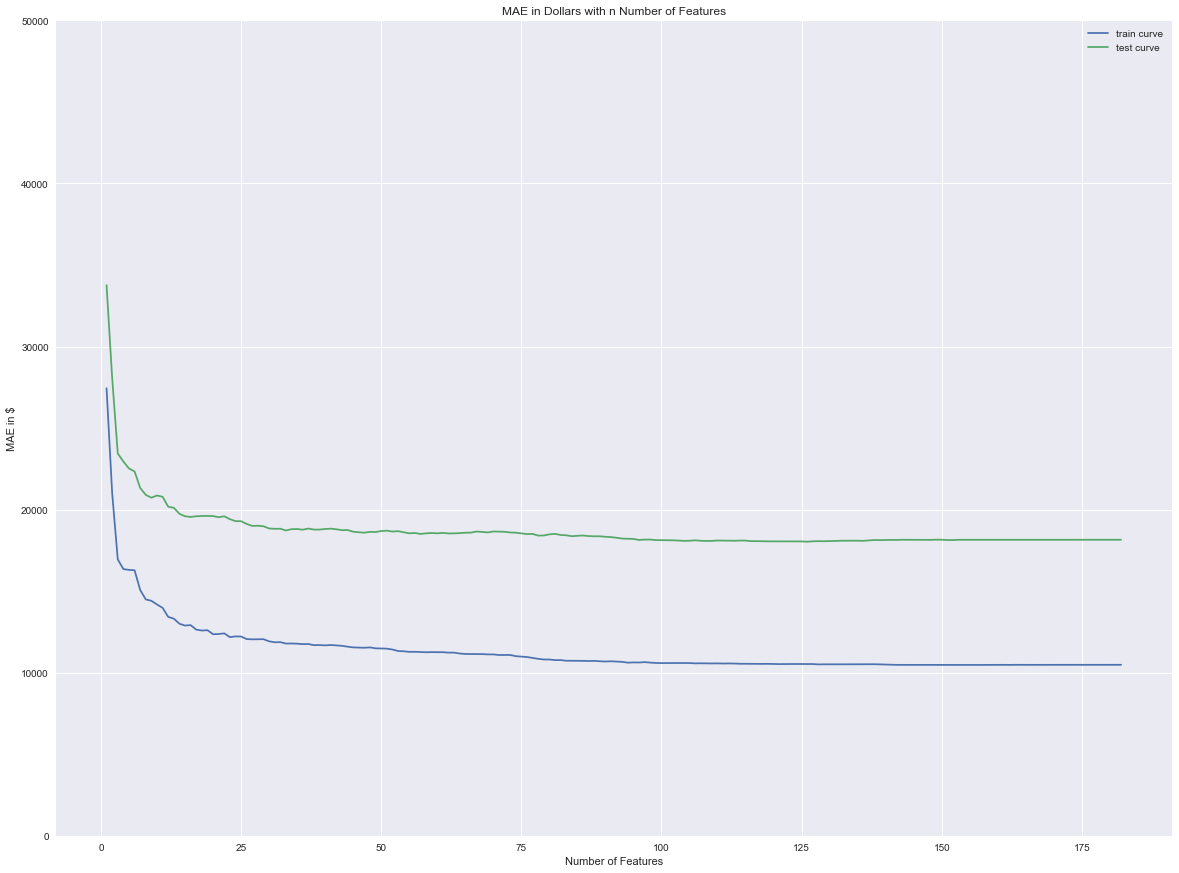

In [138]:
n_Features = range(1, X_tr.shape[1])

train_scores = []
test_scores = []

for feature in n_Features:
    
    rfe_n = RFE(ridge, feature)
    rfe_n.fit(X_tr, y_tr)
    
    y_tr_pred = rfe_n.predict(X_tr)
    train_scores.append(mae(10**y_tr, 10**y_tr_pred))
    
    y_te_pred = rfe_n.predict(X_te)
    test_scores.append(mae(10**y_te, 10**y_te_pred))

# Plot the validation curves
fig = plt.figure(figsize=(20,15))
plt.plot(n_Features, train_scores, label='train curve')
plt.plot(n_Features, test_scores, label='test curve')
plt.xlabel('Number of Features')
plt.ylabel('MAE in $')
plt.ylim(0, 50000)
plt.title('MAE in Dollars with n Number of Features')
plt.legend()
plt.show()

In [139]:
ridge = Ridge(best_alpha)
ridge.fit(X_tr, y_tr)

y_tr_pred_r = ridge.predict(X_tr)
y_te_pred_r = ridge.predict(X_te)

print('RMSLE on our train data: {:.3f}'.format(sqrt(mse(y_tr, y_tr_pred_r))))
print('RMSLE on our test data: {:.3f}'.format(sqrt(mse(y_te, y_te_pred_r))))

print('Score on train data:{}'.format(ridge.score(X_tr, y_tr)))
print('Score on train data:{}'.format(ridge.score(X_te, y_te)))

print('MAE of the SalePrice on our train data: {:.3f}'.format(mae(10**y_tr, 10**y_tr_pred)))
print('MAE of the SalePrice on our test data: {:.3f}'.format(mae(10**y_te, 10**y_te_pred)))

RMSLE on our train data: 0.042
RMSLE on our test data: 0.062
Score on train data:0.9297006940552871
Score on train data:0.8800936121379679
MAE of the SalePrice on our train data: 10485.339
MAE of the SalePrice on our test data: 18154.194


### Model Comparison
<a id="mc1" > 

In [140]:
def MAE(y, y_pred):
    return np.mean(np.abs(y - y_pred))

In [141]:
mae_ridge

18154.19403326875

In [142]:
mae_base = MAE(10**y_te, 10**np.mean(y_tr))
mae_simple = mae(10**y_te, 10**y_te_simple_pred)
mae_mid = mae(10**y_te, 10**y_te_mid_pred)
mae_ridge = mae(10**y_te, 10**y_te_pred_r)

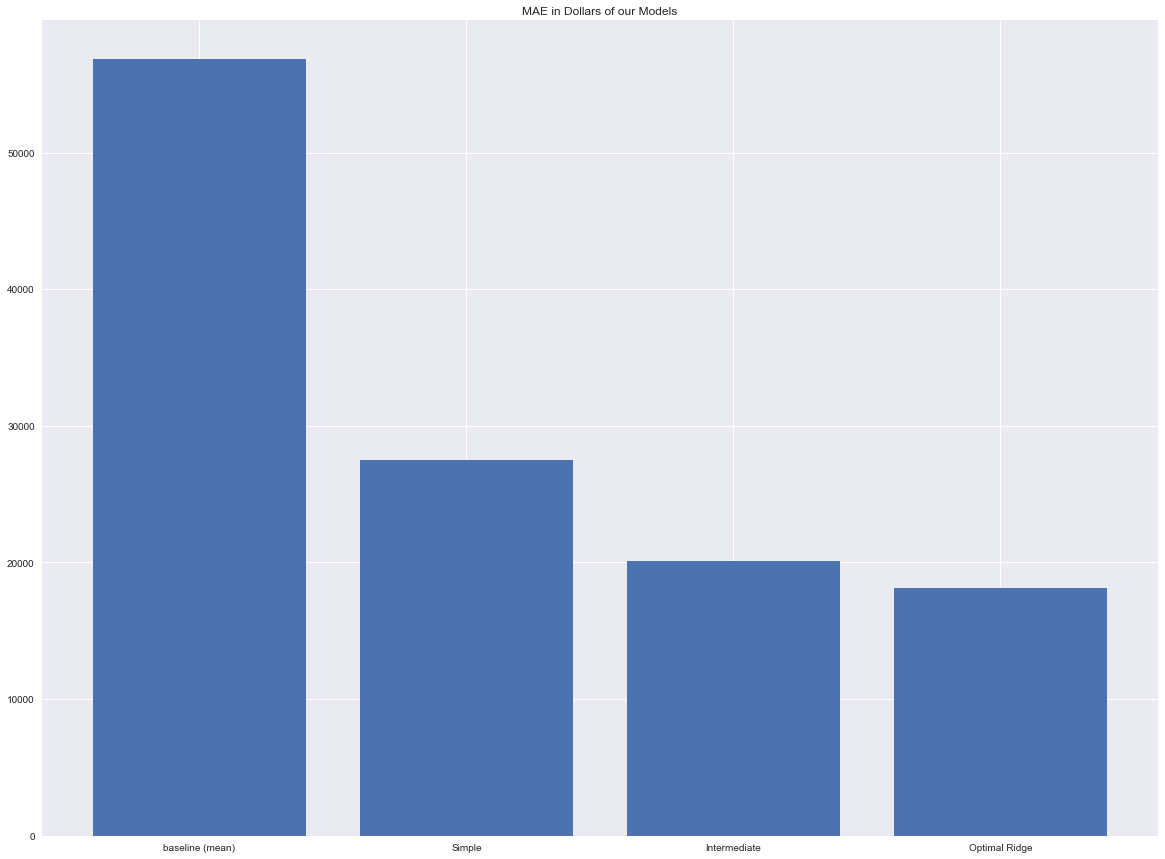

In [143]:
fig = plt.figure(figsize=(20,15))
plt.bar([1, 2, 3, 4],[mae_base, mae_simple, mae_mid, mae_ridge])
plt.xticks([1, 2, 3, 4], ['baseline (mean)', 'Simple','Intermediate','Optimal Ridge'])
plt.title('MAE in Dollars of our Models')
plt.show()

***

## Making Predictions
<a id="mp" > 

In [144]:
pred_scaled = scale(pred)

In [145]:
predictions = ridge.predict(pred_scaled)

In [146]:
pred['predictions'] = predictions

In [147]:
pred['SalePrice'] = 10**pred['predictions']

In [148]:
pred['SalePrice'].head()

PID
909279080   179114.811
907126050   141428.950
528144030   247002.217
535452060   122262.807
911202100    81540.949
Name: SalePrice, dtype: float64

In [149]:
pred.reset_index(inplace=True)

In [150]:
predictions_df = pred[['PID','SalePrice']]
predictions_df.head()

,PID,SalePrice
0,909279080,179114.811
1,907126050,141428.950
2,528144030,247002.217
3,535452060,122262.807
4,911202100,81540.949


In [151]:
predictions_df['SalePrice'].describe()

count      500.000
mean    169122.645
std      67807.457
min      49498.350
25%     125280.788
50%     154852.099
75%     196917.515
max     660232.546
Name: SalePrice, dtype: float64

In [152]:
train['SalePrice'] = 10**train['SalePrice']
train['SalePrice'].describe()

count     2426.000
mean    180215.641
std      79615.672
min      12789.000
25%     129000.000
50%     160000.000
75%     213099.750
max     755000.000
Name: SalePrice, dtype: float64

In [153]:
predictions_df.to_csv('house-prices-pred.csv', index=False, float_format='%.0f')